# Visualizing the Gender Gap Across College Degrees

Each year, the Department of Education Statistics (NCES) releases data sets with insights from learning outcomes, access to education, resources for education, to name a few. One NCES data [set](https://nces.ed.gov/programs/digest/2013menu_tables.asp) summarizes the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal [website](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). His analysis largely focuses on the gender gap in STEM fields. Presently, we will focus on comparisons across STEM degrees as well as non-STEM degrees.

In addition to the meaningful comparisons of education data, we will also take the opportunity to use good practices of visualization as famously developed by Edward Tufte in his seminal work, [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), and other books and essays. Throughout the following refinement steps of each graph, you'll see reduction in non-essential ink (clutter) on the page which, in turn, allows for clearer indentification of patterns on the graphs.

## STEM Degree Visualizations

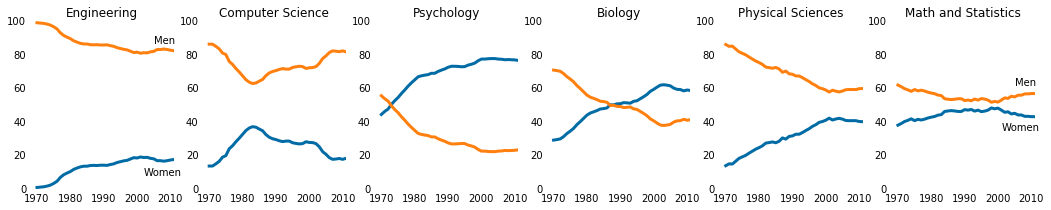

In [1]:
# initialize needed libraries and inline Jupyter viewing of graphs
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# read the raw data and set custom color-blind-friendly colors
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# create a list of the STEM degree categories under analysis
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# create a figure 18 inches long and 3 inches high
fig = plt.figure(figsize=(18, 3))

# add six subplots and format each one
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

The most drastic change of balance over time is in the Psychology degree: women majors surpassed men in the mid-1970s and continued to increase through to the early 2000s. Some would consider psychology more aptly classified as a social science, so we'll compare this psychology graph with the larger data set later in this project.

Of the "pure" STEM fields, Biology is the only field in which there's been a reversal of the majority of women/men earning the degree. Women surpassed men in the late 1980s and continued increasing their representation in Biology through the mid 2000s. Since then, the balance has shifted somewhat to the 50-50 mark, but women are still in the majority in the field of Biology.

Physical Sciences and Math and Statistics have all become more balanced over time, whereas engineering and especially computer science have stayed as primarily male-represented fields.

## STEM, Liberal Arts, and Other Degree Visualizations

As we compare more degrees, we'll rearrange the major categories in three columns; specific majors will fall into the various rows (either 5 or 6, depending on the category).

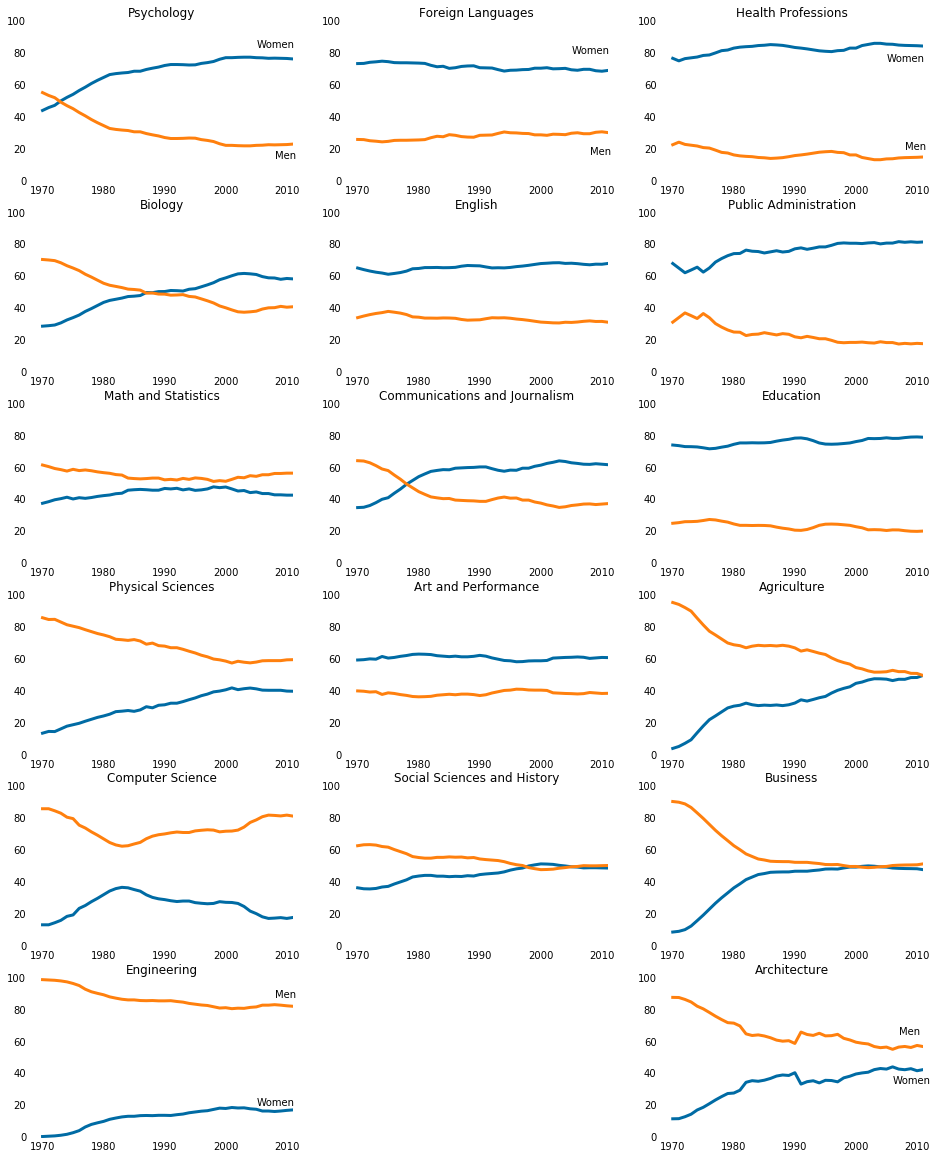

In [10]:
# create three lists of degree categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# create a figure 18 inches long and 3 inches high
fig = plt.figure(figsize=(16, 20))

# add first column and populate the rows for STEM
for sp in range(0,18,3): # range has a start, stop, and step
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int(sp/3) # since range is incrementing by three, adjust the cat_index down to increment by one
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2005, 84, 'Women')
        ax.text(2008, 14, 'Men')
    elif cat_index == 5:
        ax.text(2008, 88, 'Men')
        ax.text(2005, 20, 'Women')

# add the second column
for sp in range(1,16,3): # range has a start, stop, and step - stop at 16 due to only 5 majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2005, 80, 'Women')
        ax.text(2008, 17, 'Men')

# add a third column
for sp in range(2,20,3): # range has a start, stop, and step - stop at 20, three beyond the last slot for a majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2008, 20, 'Men')

    elif cat_index == 5:
        ax.text(2007, 65, 'Men')
        ax.text(2006, 34, 'Women')
        
plt.show()

As we compare the earlier result for psychology with the social sciences and history category, we can see that psychology degree selection choices are more akin to public administration, foreign languages, health care, and education. In these fields, women choose these degrees more than men in an approximately 80-20 ratio.


## Clean Up the Titles and X-Axis

The x-axis labels are cluttering the view of each axis title. Let's remove that extra ink to improve readability. We'll keep the x-axis labels for the very bottom axis of each column.

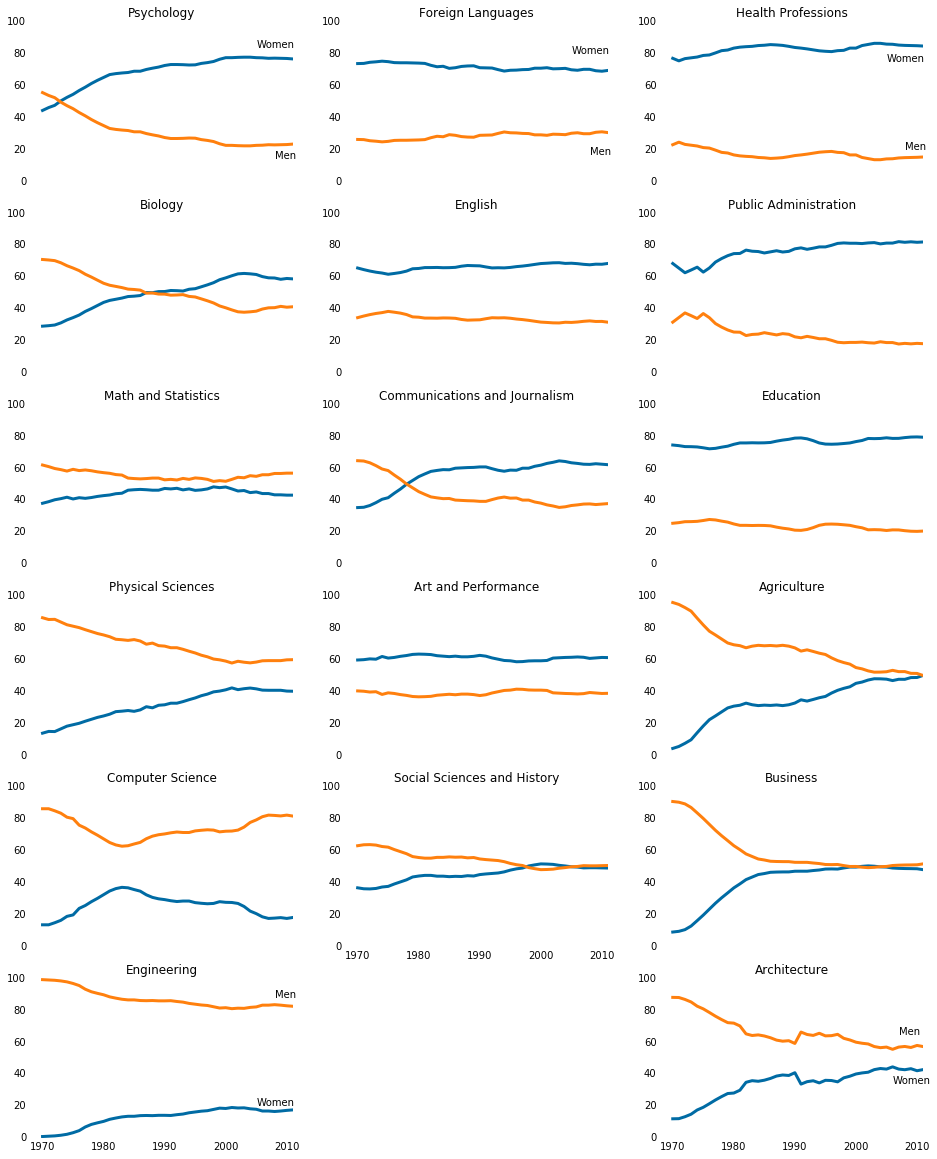

In [3]:
# create three lists of degree categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# create a figure 18 inches long and 3 inches high
fig = plt.figure(figsize=(16, 20))

# add first column and populate the rows for STEM
for sp in range(0,18,3): # range has a start, stop, and step
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int(sp/3) # since range is incrementing by three, adjust the cat_index down to increment by one
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if cat_index == 0:
        ax.text(2005, 84, 'Women')
        ax.text(2008, 14, 'Men')
    elif cat_index == 5:
        ax.text(2008, 88, 'Men')
        ax.text(2005, 20, 'Women')
        ax.tick_params(labelbottom='on')

# add the second column
for sp in range(1,16,3): # range has a start, stop, and step - stop at 16 due to only 5 majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if cat_index == 0:
        ax.text(2005, 80, 'Women')
        ax.text(2008, 17, 'Men')
        
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

# add a third column
for sp in range(2,20,3): # range has a start, stop, and step - stop at 20, three beyond the last slot for a majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if cat_index == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2008, 20, 'Men')

    elif cat_index == 5:
        ax.text(2007, 65, 'Men')
        ax.text(2006, 34, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

## Clean Up of the Y-Axes

Each y-axis contains the same minimum and maximum values accompanied by the same tick-mark intervals. Let's reduce the visual clutter through the removal of all but the min/max values of the y-axes.

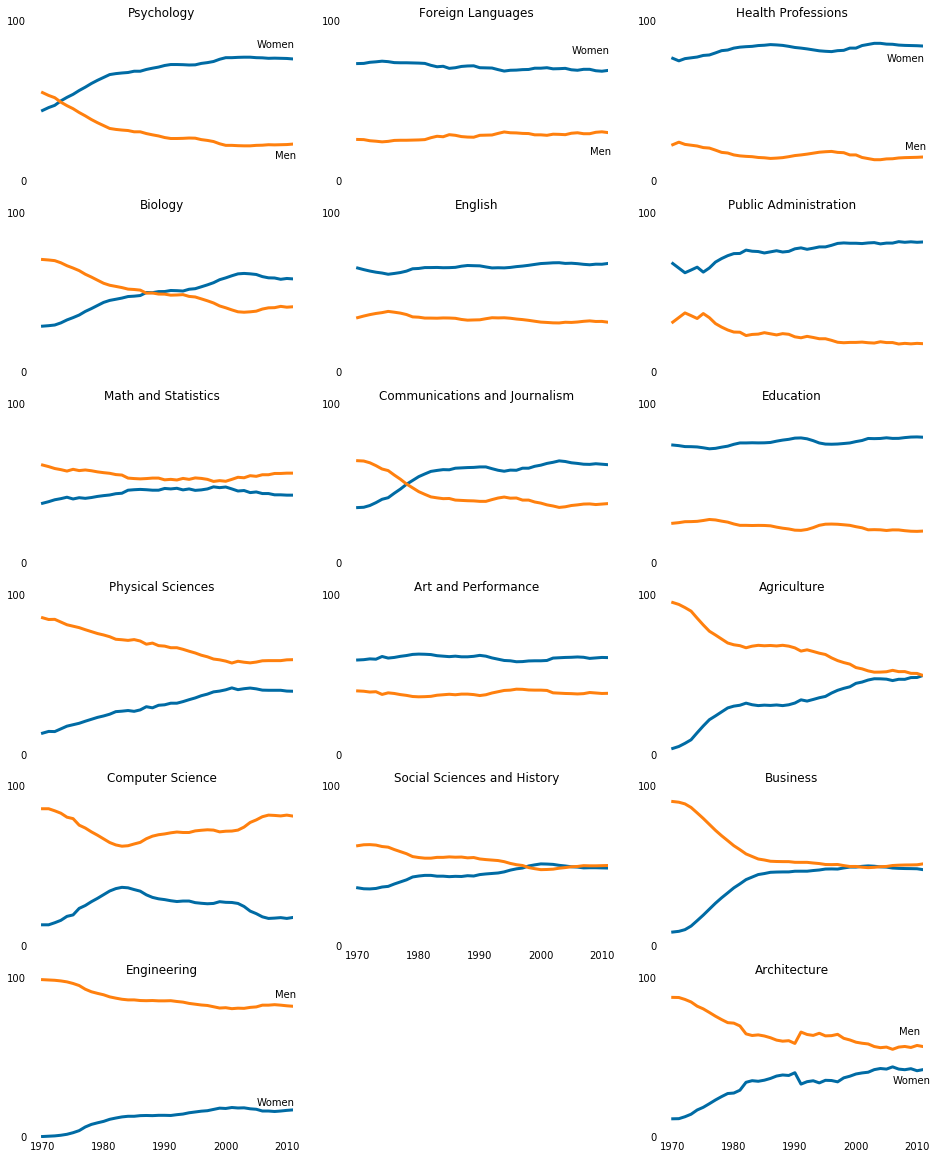

In [4]:
# create three lists of degree categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# create a figure 18 inches long and 3 inches high
fig = plt.figure(figsize=(16, 20))

# add first column and populate the rows for STEM
for sp in range(0,18,3): # range has a start, stop, and step
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int(sp/3) # since range is incrementing by three, adjust the cat_index down to increment by one
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100]) # limits tick marks to just two values
    
    if cat_index == 0:
        ax.text(2005, 84, 'Women')
        ax.text(2008, 14, 'Men')
    elif cat_index == 5:
        ax.text(2008, 88, 'Men')
        ax.text(2005, 20, 'Women')
        ax.tick_params(labelbottom='on')

# add the second column
for sp in range(1,16,3): # range has a start, stop, and step - stop at 16 due to only 5 majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100]) # limits tick marks to just two values
    
    if cat_index == 0:
        ax.text(2005, 80, 'Women')
        ax.text(2008, 17, 'Men')
        
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

# add a third column
for sp in range(2,20,3): # range has a start, stop, and step - stop at 20, three beyond the last slot for a majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100]) # limits tick marks to just two values
    
    if cat_index == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2008, 20, 'Men')

    elif cat_index == 5:
        ax.text(2007, 65, 'Men')
        ax.text(2006, 34, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

## Finding the 50-50 Gender Balance Point

While the above chart is much less cluttered it is somewhat difficult to ascertain the 50-50 balance point of gender equality in college majors.

We'll add a transparent horizontal guide line at the 505 mark of the graphs to enhance visual comparisons on the chart.

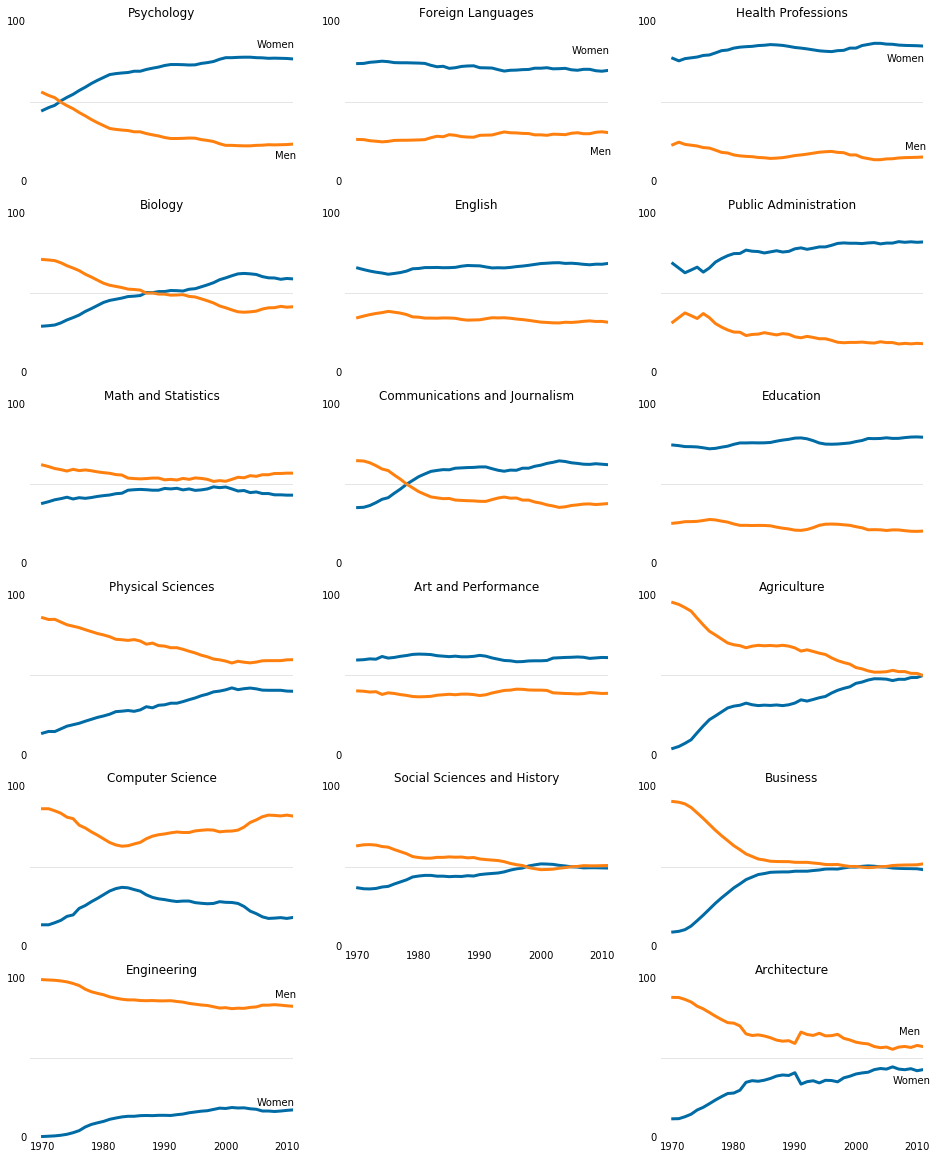

In [5]:
# create three lists of degree categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# create a figure 18 inches long and 3 inches high
fig = plt.figure(figsize=(16, 20))

# add first column and populate the rows for STEM
for sp in range(0,18,3): # range has a start, stop, and step
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int(sp/3) # since range is incrementing by three, adjust the cat_index down to increment by one
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # add light horiz line
    
    if cat_index == 0:
        ax.text(2005, 84, 'Women')
        ax.text(2008, 14, 'Men')
    elif cat_index == 5:
        ax.text(2008, 88, 'Men')
        ax.text(2005, 20, 'Women')
        ax.tick_params(labelbottom='on')

# add the second column
for sp in range(1,16,3): # range has a start, stop, and step - stop at 16 due to only 5 majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # add light horiz line

    if cat_index == 0:
        ax.text(2005, 80, 'Women')
        ax.text(2008, 17, 'Men')
        
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

# add a third column
for sp in range(2,20,3): # range has a start, stop, and step - stop at 20, three beyond the last slot for a majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # add light horiz line

    if cat_index == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2008, 20, 'Men')

    elif cat_index == 5:
        ax.text(2007, 65, 'Men')
        ax.text(2006, 34, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

## Saving Work for Export

Finally, what's a great chart if we can't export it to a file or presentation? In this final step, we'll save the last graph into a .png file.

First, let's double check the backend or outputs that matplotlib is currently using within Jupyter:

In [8]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

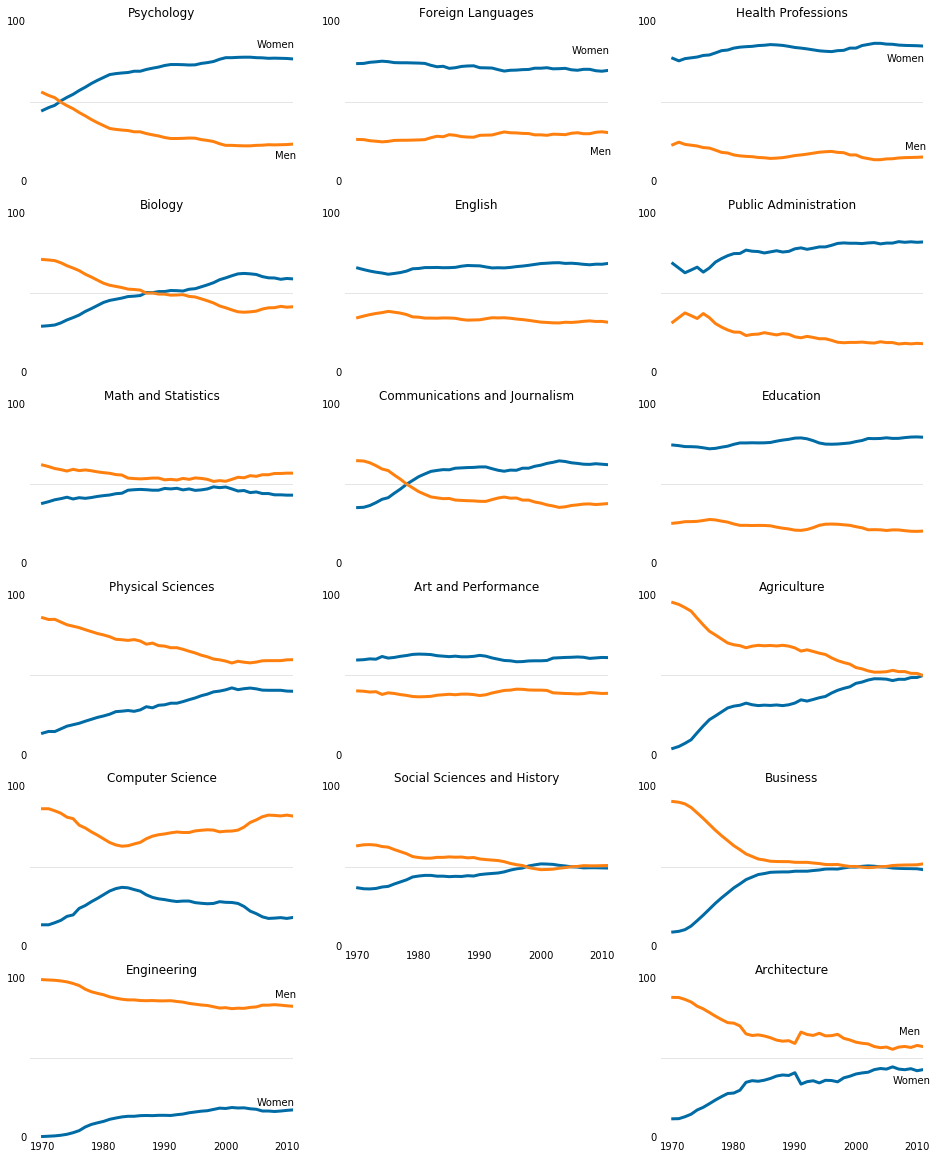

In [9]:
# create three lists of degree categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# create a figure 18 inches long and 3 inches high
fig = plt.figure(figsize=(16, 20))

# add first column and populate the rows for STEM
for sp in range(0,18,3): # range has a start, stop, and step
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int(sp/3) # since range is incrementing by three, adjust the cat_index down to increment by one
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # add light horiz line
    
    if cat_index == 0:
        ax.text(2005, 84, 'Women')
        ax.text(2008, 14, 'Men')
    elif cat_index == 5:
        ax.text(2008, 88, 'Men')
        ax.text(2005, 20, 'Women')
        ax.tick_params(labelbottom='on')

# add the second column
for sp in range(1,16,3): # range has a start, stop, and step - stop at 16 due to only 5 majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # add light horiz line

    if cat_index == 0:
        ax.text(2005, 80, 'Women')
        ax.text(2008, 17, 'Men')
        
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

# add a third column
for sp in range(2,20,3): # range has a start, stop, and step - stop at 20, three beyond the last slot for a majors in this category
    ax = fig.add_subplot(6,3,sp+1)
    cat_index = int((sp-1)/3) # since range (sp) is starting at 1 (rather than zero) and incrementing by three, adjust the cat_index down to increment by one in line with first column
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # add light horiz line

    if cat_index == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2008, 20, 'Men')

    elif cat_index == 5:
        ax.text(2007, 65, 'Men')
        ax.text(2006, 34, 'Women')
        ax.tick_params(labelbottom='on')
        
# need to export the plots before using the .show() method
plt.savefig('degree_by_gender.png')
        
plt.show()